# Homework 1 CPSC 8430
## Andrew Wright

In [1]:
### import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

## 1-1: Simulate a function

Function I am using is:

$$
f(x) = 5\sin^2(\frac{x}{2})
$$

## DNN 1

[115.11853790283203, 92.09919250011444, 83.03419876098633, 75.84232330322266, 71.52699828147888, 63.948888301849365, 52.5438996553421, 42.26899552345276, 33.85342437028885, 25.847949624061584, 21.143428474664688, 12.120561614632607, 7.728203363716602, 4.768919009715319, 2.687251327559352, 1.7975473552942276, 0.9287462588399649, 0.7938681878149509, 0.533942602109164, 0.47216008650138974, 0.22899601701647043, 0.21955859987065196, 0.1435402154456824, 0.12432890338823199, 0.12582636659499258, 0.16664164036046714, 0.10411270009353757, 0.14293557684868574, 0.07631196919828653, 0.14586907695047557, 0.18533425073837861, 0.05143879124079831, 0.1130176437436603, 0.0570913459523581, 0.07751654546882492, 0.056679078697925434, 0.05510106304427609, 0.056641845643753186, 0.2606646469794214, 0.42967541236430407, 0.23727323644561693, 0.27688649226911366, 0.08005344885168597, 0.04784147837199271, 0.03606976452283561, 0.03482714490382932, 0.05561970801500138, 0.03266124922083691, 0.03455443269922398, 0.0

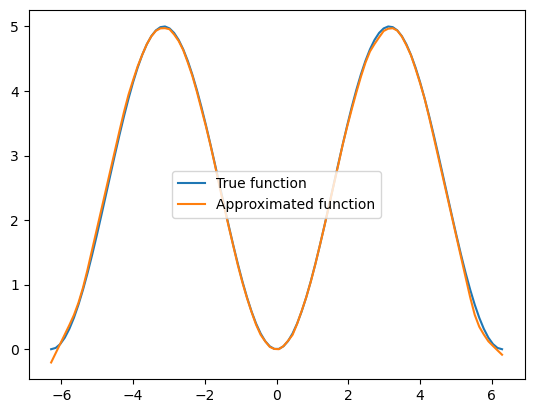

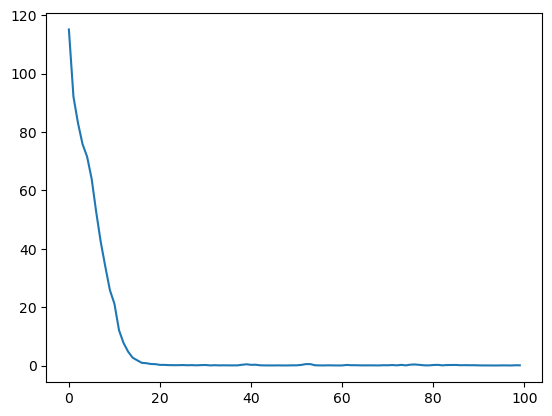

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the function to approximate
def fn(x):
    return 5*torch.sin(0.5*x)**2

# Create the neural network model
class Approximator(nn.Module):
    def __init__(self, D_i, D_k, D_o):
        super(Approximator, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(D_i, D_k),  # Input layer
            nn.ReLU(),
            nn.Linear(D_k, D_k),  # Hidden layer 1
            nn.ReLU(),
            nn.Linear(D_k, D_k),  # Hidden layer 2
            nn.ReLU(),
            nn.Linear(D_k, D_o)     # Output layer
        )

    def forward(self, x):
        return self.layers(x)

# Create model, optimizer, and loss function
model = Approximator(D_i = 1, D_k = 100, D_o = 1)
optimizer = optim.Adam(model.parameters())
loss_fn = nn.MSELoss()

# Generate training data
x_train = torch.linspace(-2 * torch.pi, 2 * torch.pi, 200).unsqueeze(1)
y_train = fn(x_train)
data_loader = DataLoader(TensorDataset(x_train,y_train), batch_size=10, shuffle=True)

# Training loop
loss_vec = []
for epoch in range(100):
    epoch_loss = 0.0
    for i,data in enumerate(data_loader):
        x_batch, y_batch = data
        optimizer.zero_grad()
    #print(x_train.shape)
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    loss_vec.append(epoch_loss)
# Evaluate the model
x_test = torch.linspace(-2 * torch.pi, 2 * torch.pi, 100).unsqueeze(1)
y_test = fn(x_test)
y_pred = model(x_test)

print("Mean squared error:", loss_fn(y_pred, y_test).item())

# Visualize the results (optional)
import matplotlib.pyplot as plt
plt.plot(x_test.detach(), y_test.detach(), label="True function")
plt.plot(x_test.detach(), y_pred.detach(), label="Approximated function")
plt.legend()
plt.show()
plt.plot(np.arange(0,len(loss_vec)),np.array(loss_vec))


## Function #2